# Week2 Prediction

I diceded to use Long Short Term Memory Network(LSTM) for building the model to predict the stock prices.

## Apple
I used 5 years of Apple's historical data to build the model.

In [283]:
import pandas as pd
Apple = pd.read_csv('Apple2.csv')
Apple

,Date,Close/Last,Volume,Open,High,Low
0,11/28/16,27.89,108217280,27.86,28.12,27.85
1,11/29/16,27.87,114031120,27.70,28.01,27.52
2,11/30/16,27.63,144605800,27.90,28.05,27.57
3,12/1/16,27.37,148138080,27.59,27.74,27.26
4,12/2/16,27.48,105925280,27.29,27.52,27.21
...,...,...,...,...,...,...
1253,11/18/21,157.87,137827700,153.71,158.67,153.05
1254,11/19/21,160.55,117305600,157.65,161.02,156.53
1255,11/22/21,161.02,117467900,161.68,165.70,161.00
1256,11/23/21,161.41,96041900,161.12,161.80,159.06


In [284]:
y = Apple.reset_index()['Close/Last']

Text(0, 0.5, 'Apple Stock Price')

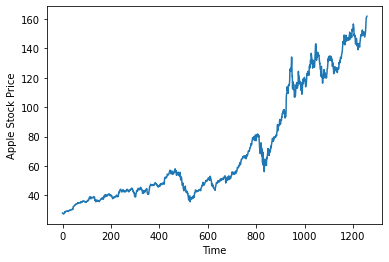

In [285]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')

This is the graph of 5-year Apple's stock price.

In [286]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [287]:
training_size = int(len(y)*0.65)
test_size = len(y) - training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [288]:
len(train_data),len(test_data)

(817, 441)

In [289]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [290]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [291]:
print(X_train)

[[0.00452993 0.00438141 0.00259914 ... 0.05859201 0.0618595  0.06156245]
 [0.00438141 0.00259914 0.00066835 ... 0.0618595  0.06156245 0.06408733]
 [0.00259914 0.00066835 0.00148522 ... 0.06156245 0.06408733 0.06572108]
 ...
 [0.21320362 0.2143918  0.20392099 ... 0.39826229 0.39209862 0.3785831 ]
 [0.2143918  0.20392099 0.20741126 ... 0.39209862 0.3785831  0.35103223]
 [0.20392099 0.20741126 0.21884747 ... 0.3785831  0.35103223 0.33224417]]


In [292]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [294]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [295]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 203ms/step - loss: 0.0077 - val_loss: 0.1498
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0018 - val_loss: 0.0222
Epoch 3/100
12/12 [==============================] - 1s 89ms/step - loss: 7.0930e-04 - val_loss: 0.0057
Epoch 4/100
12/12 [==============================] - 1s 89ms/step - loss: 4.5109e-04 - val_loss: 0.0111
Epoch 5/100
12/12 [==============================] - 1s 89ms/step - loss: 3.2684e-04 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 1s 90ms/step - loss: 3.1736e-04 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 1s 89ms/step - loss: 3.2832e-04 - val_loss: 0.0022
Epoch 8/100
12/12 [==============================] - 1s 93ms/step - loss: 2.9957e-04 - val_loss: 0.0025
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 2.9195e-04 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 1s 88ms/step - lo

12/12 [==============================] - 1s 95ms/step - loss: 1.4828e-04 - val_loss: 0.0076
Epoch 80/100
12/12 [==============================] - 1s 94ms/step - loss: 1.3905e-04 - val_loss: 0.0054
Epoch 81/100
12/12 [==============================] - 1s 88ms/step - loss: 1.4614e-04 - val_loss: 0.0028
Epoch 82/100
12/12 [==============================] - 1s 95ms/step - loss: 1.2689e-04 - val_loss: 0.0031
Epoch 83/100
12/12 [==============================] - 1s 98ms/step - loss: 1.1236e-04 - val_loss: 0.0045
Epoch 84/100
12/12 [==============================] - 1s 97ms/step - loss: 1.1696e-04 - val_loss: 0.0130
Epoch 85/100
12/12 [==============================] - 1s 98ms/step - loss: 1.1218e-04 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 1s 94ms/step - loss: 1.2799e-04 - val_loss: 0.0020
Epoch 87/100
12/12 [==============================] - 1s 98ms/step - loss: 1.2919e-04 - val_loss: 0.0132
Epoch 88/100
12/12 [==============================] - 1s 93ms/step -

In [296]:
import tensorflow as tf

In [297]:
tf.__version__

'2.7.0'

In [298]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [299]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [300]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.77483696358818

In [301]:
math.sqrt(mean_squared_error(ytest,test_predict))

125.98633808305729

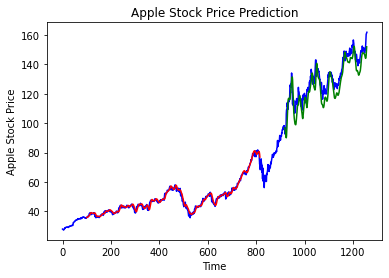

In [302]:
look_back=100
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
plt.plot(scaler.inverse_transform(y), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot, color = 'green', label = 'Test Predict Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Apple Stock Price')
plt.show()

So the bule line is the actual stock price of Apple, the red line is the training predict price and the green one is the testing predict price, we can see comparison of the prediction and the real value.

In [303]:
len(test_data)

441

In [304]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [305]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [306]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.97304]
101
1 day input [0.86113174 0.87501857 0.87048864 0.8789544  0.90502005 0.90004456
 0.88452399 0.85526511 0.88274172 0.87717214 0.88756869 0.90063865
 0.90383187 0.88734591 0.87405317 0.8789544  0.88058815 0.87806327
 0.89172731 0.88868261 0.88949948 0.88266746 0.88229615 0.87865736
 0.88058815 0.90308926 0.90464874 0.91964949 0.91274321 0.8843012
 0.88682608 0.89789098 0.90917867 0.90851032 0.89915342 0.89306401
 0.90093569 0.93450171 0.92492203 0.92997178 0.93843755 0.94326452
 0.96101292 0.94927967 0.94155651 0.90368335 0.90799049 0.89737116
 0.90412892 0.90234665 0.88207337 0.85890391 0.8625427  0.88051389
 0.88779147 0.88845982 0.87694935 0.85125501 0.85808703 0.84821031
 0.85675033 0.83068469 0.84531412 0.85192336 0.86150304 0.85860686
 0.85793851 0.84828457 0.8438289  0.86499332 0.87301352 0.88571216
 0.90212387 0.90583692 0.90747067 0.90160404 0.90123273 0.90628249
 0.90279222 0.93041735 0.90984702 0.90360909 0.91148077 0.92239715
 0.91846131 0.92083767 0.91459973 0.9

10 day output [[0.9682478]]
11 day input [0.88756869 0.90063865 0.90383187 0.88734591 0.87405317 0.8789544
 0.88058815 0.87806327 0.89172731 0.88868261 0.88949948 0.88266746
 0.88229615 0.87865736 0.88058815 0.90308926 0.90464874 0.91964949
 0.91274321 0.8843012  0.88682608 0.89789098 0.90917867 0.90851032
 0.89915342 0.89306401 0.90093569 0.93450171 0.92492203 0.92997178
 0.93843755 0.94326452 0.96101292 0.94927967 0.94155651 0.90368335
 0.90799049 0.89737116 0.90412892 0.90234665 0.88207337 0.85890391
 0.8625427  0.88051389 0.88779147 0.88845982 0.87694935 0.85125501
 0.85808703 0.84821031 0.85675033 0.83068469 0.84531412 0.85192336
 0.86150304 0.85860686 0.85793851 0.84828457 0.8438289  0.86499332
 0.87301352 0.88571216 0.90212387 0.90583692 0.90747067 0.90160404
 0.90123273 0.90628249 0.90279222 0.93041735 0.90984702 0.90360909
 0.91148077 0.92239715 0.91846131 0.92083767 0.91459973 0.91734739
 0.89588593 0.89551463 0.91125798 0.91133224 0.91875835 0.93724937
 0.96977573 0.98967771

19 day output [[0.7954162]]
20 day input [0.88868261 0.88949948 0.88266746 0.88229615 0.87865736 0.88058815
 0.90308926 0.90464874 0.91964949 0.91274321 0.8843012  0.88682608
 0.89789098 0.90917867 0.90851032 0.89915342 0.89306401 0.90093569
 0.93450171 0.92492203 0.92997178 0.93843755 0.94326452 0.96101292
 0.94927967 0.94155651 0.90368335 0.90799049 0.89737116 0.90412892
 0.90234665 0.88207337 0.85890391 0.8625427  0.88051389 0.88779147
 0.88845982 0.87694935 0.85125501 0.85808703 0.84821031 0.85675033
 0.83068469 0.84531412 0.85192336 0.86150304 0.85860686 0.85793851
 0.84828457 0.8438289  0.86499332 0.87301352 0.88571216 0.90212387
 0.90583692 0.90747067 0.90160404 0.90123273 0.90628249 0.90279222
 0.93041735 0.90984702 0.90360909 0.91148077 0.92239715 0.91846131
 0.92083767 0.91459973 0.91734739 0.89588593 0.89551463 0.91125798
 0.91133224 0.91875835 0.93724937 0.96977573 0.98967771 0.99316798
 0.99606416 1.         0.97303998 0.98698127 0.99444526 0.99758196
 0.99797344 0.9965287

27 day output [[0.4397526]]
28 day input [0.91964949 0.91274321 0.8843012  0.88682608 0.89789098 0.90917867
 0.90851032 0.89915342 0.89306401 0.90093569 0.93450171 0.92492203
 0.92997178 0.93843755 0.94326452 0.96101292 0.94927967 0.94155651
 0.90368335 0.90799049 0.89737116 0.90412892 0.90234665 0.88207337
 0.85890391 0.8625427  0.88051389 0.88779147 0.88845982 0.87694935
 0.85125501 0.85808703 0.84821031 0.85675033 0.83068469 0.84531412
 0.85192336 0.86150304 0.85860686 0.85793851 0.84828457 0.8438289
 0.86499332 0.87301352 0.88571216 0.90212387 0.90583692 0.90747067
 0.90160404 0.90123273 0.90628249 0.90279222 0.93041735 0.90984702
 0.90360909 0.91148077 0.92239715 0.91846131 0.92083767 0.91459973
 0.91734739 0.89588593 0.89551463 0.91125798 0.91133224 0.91875835
 0.93724937 0.96977573 0.98967771 0.99316798 0.99606416 1.
 0.97303998 0.98698127 0.99444526 0.99758196 0.99797344 0.99652874
 0.99365407 0.9894588  0.98390025 0.97687262 0.96824777 0.95789158
 0.94566703 0.93143451 0.91504

In [307]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [308]:
import matplotlib.pyplot as plt

In [309]:
len(y)

1258

In [310]:
Y=y.tolist()
Y.extend(lst_output)

Text(0, 0.5, 'Stock Price')

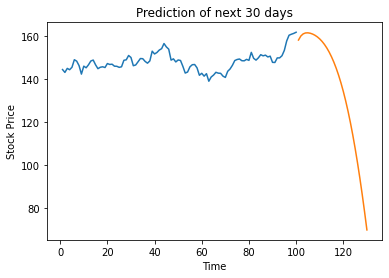

In [311]:
plt.plot(day_new,scaler.inverse_transform(y[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

We can see that stock prices will  rise in the next few days and then the price will decrease according to our prediction. So i will invest more money on Apple for now, I will buy more Apple stock.

## Amazon

I used 5 years of Apple's historical data to predict the price.

In [312]:
import pandas as pd
Amazon = pd.read_csv('Amazon.csv')

In [313]:
y1 = Amazon.reset_index()['Close/Last']
y1

0        766.77
1        762.52
2        750.57
3        743.65
4        740.34
         ...   
1253    3696.06
1254    3676.57
1255    3572.57
1256    3580.04
1257    3580.41
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'Amazon Stock Price')

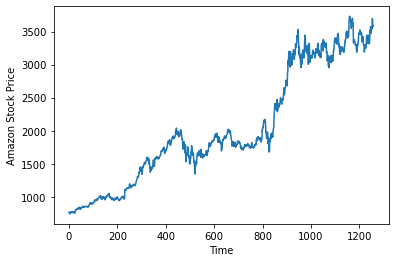

In [314]:
plt.plot(y1)
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')

In [315]:
scaler1 = MinMaxScaler(feature_range=(0,1))
y1 = scaler1.fit_transform(np.array(y1).reshape(-1,1))

In [316]:
training_size1 = int(len(y1)*0.65)
test_size1 = len(y1) - training_size1
train_data1,test_data1=y1[0:training_size1,:],y1[training_size1:len(y1),:1]

In [317]:
import numpy
def create_dataset1(dataset1, time_step=1):
    dataX1, dataY1 = [], []
    for u in range(len(dataset1)-time_step-1):
        b = dataset1[u:(u+time_step), 0]
        dataX1.append(b)
        dataY1.append(dataset1[u + time_step, 0])
    return numpy.array(dataX1), numpy.array(dataY1)

In [318]:
time_step = 100
X1_train, y1_train = create_dataset1(train_data1, time_step)
X1_test, y1test = create_dataset1(test_data1, time_step)

In [319]:
X1_train = X1_train.reshape(X1_train.shape[0],X1_train.shape[1] , 1)
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1] , 1)

In [320]:
model1 = Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X1_train,y1_train,validation_data=(X1_test,y1test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 180ms/step - loss: 0.0254 - val_loss: 0.1057
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0047 - val_loss: 0.0201
Epoch 3/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0023 - val_loss: 0.0291
Epoch 4/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0011 - val_loss: 0.0110
Epoch 5/100
12/12 [==============================] - 1s 92ms/step - loss: 7.3940e-04 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 1s 97ms/step - loss: 8.0090e-04 - val_loss: 0.0056
Epoch 7/100
12/12 [==============================] - 1s 92ms/step - loss: 7.0190e-04 - val_loss: 0.0083
Epoch 8/100
12/12 [==============================] - 1s 89ms/step - loss: 6.5009e-04 - val_loss: 0.0058
Epoch 9/100
12/12 [==============================] - 1s 90ms/step - loss: 6.3348e-04 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 1s 92ms/step - loss: 6.32

12/12 [==============================] - 1s 87ms/step - loss: 3.2289e-04 - val_loss: 0.0355
Epoch 80/100
12/12 [==============================] - 1s 87ms/step - loss: 2.7640e-04 - val_loss: 0.0456
Epoch 81/100
12/12 [==============================] - 1s 87ms/step - loss: 2.7695e-04 - val_loss: 0.0421
Epoch 82/100
12/12 [==============================] - 1s 89ms/step - loss: 2.7166e-04 - val_loss: 0.0505
Epoch 83/100
12/12 [==============================] - 1s 89ms/step - loss: 2.6780e-04 - val_loss: 0.0502
Epoch 84/100
12/12 [==============================] - 1s 89ms/step - loss: 2.6379e-04 - val_loss: 0.0582
Epoch 85/100
12/12 [==============================] - 1s 87ms/step - loss: 2.8370e-04 - val_loss: 0.0479
Epoch 86/100
12/12 [==============================] - 1s 88ms/step - loss: 2.6303e-04 - val_loss: 0.0390
Epoch 87/100
12/12 [==============================] - 1s 88ms/step - loss: 2.5359e-04 - val_loss: 0.0519
Epoch 88/100
12/12 [==============================] - 1s 87ms/step -

In [324]:
train_predict1 = model1.predict(X1_train)
test_predict1 = model1.predict(X1_test)

In [325]:
train_predict1 = scaler1.inverse_transform(train_predict1)
test_predict1 = scaler1.inverse_transform(test_predict1)

In [326]:
math.sqrt(mean_squared_error(y1_train,train_predict1))

1596.4797703050074

In [327]:
math.sqrt(mean_squared_error(y1test,test_predict1))

2864.4203084430515

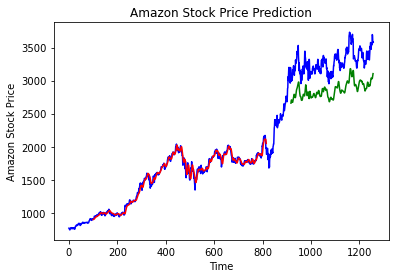

In [328]:
look_back=100
trainPredictPlot1 = numpy.empty_like(y1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict1)+look_back, :] = train_predict1
testPredictPlot1 = numpy.empty_like(y1)
testPredictPlot1[:, :] = numpy.nan
testPredictPlot1[len(train_predict1)+(look_back*2)+1:len(y1)-1, :] = test_predict1
plt.plot(scaler1.inverse_transform(y1), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot1, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot1, color = 'green', label = 'Test Predict Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Amazon Stock Price')
plt.show()

So the bule line is the actual stock price of Amazon, the red line is the training predict price and the green one is the testing predict price, we can see the preiction and the real value are really close so it looks like the model is pretty decent.

In [329]:
len(test_data1)

441

In [330]:
x1_input=test_data1[341:].reshape(1,-1)
x1_input.shape

(1, 100)

In [331]:
temp1_input=list(x1_input)
temp1_input=temp1_input[0].tolist()

In [332]:
from numpy import array
lst1_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp1_input)>100):
        x1_input=np.array(temp1_input[1:])
        print("{} day input {}".format(i,x1_input))
        x1_input=x1_input.reshape(1,-1)
        x1_input=x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print("{} day output {}".format(i,y1hat))
        temp1_input.extend(y1hat[0].tolist())
        temp1_input=temp1_input[1:]
        lst1_output.extend(y1hat.tolist())
        i=i+1
    else:
        x1_input = x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print(y1hat[0])
        temp1_input.extend(y1hat[0].tolist())
        print(len(temp1_input))
        lst1_output.extend(y1hat.tolist())
        i=i+1
        
print(lst1_output)

[0.78879446]
101
1 day input [1.         0.99596465 0.99570054 0.98192954 0.98337384 0.96649694
 0.94724965 0.93921239 0.94710254 0.95111783 0.9687804  0.97500226
 0.98943856 0.96488882 0.96620273 0.95603914 0.86499146 0.866292
 0.87791326 0.87406179 0.88117296 0.87079206 0.86976567 0.86268125
 0.85312948 0.85693748 0.85375133 0.85542966 0.83636291 0.82274236
 0.81823896 0.82231777 0.8443567  0.85769975 0.85549318 0.86111659
 0.87236006 0.89641165 0.9128673  0.91561214 0.910303   0.91529453
 0.92573895 0.93115841 0.91733727 0.912319   0.90831375 0.90591661
 0.91453894 0.91870133 0.9101024  0.87439946 0.87035409 0.88253033
 0.89454944 0.89773225 0.89113929 0.86110322 0.85614178 0.85076578
 0.85017067 0.81891764 0.82935538 0.84306619 0.85657975 0.85196268
 0.83781389 0.83815825 0.85051169 0.85572053 0.89221583 0.9048267
 0.90396079 0.89423517 0.90090503 0.86765271 0.86257761 0.8811997
 0.88668938 0.90476986 0.87998275 0.86182202 0.86003002 0.88385093
 0.91494348 0.92898194 0.91894874 0.9

10 day output [[0.5371805]]
11 day input [0.9687804  0.97500226 0.98943856 0.96488882 0.96620273 0.95603914
 0.86499146 0.866292   0.87791326 0.87406179 0.88117296 0.87079206
 0.86976567 0.86268125 0.85312948 0.85693748 0.85375133 0.85542966
 0.83636291 0.82274236 0.81823896 0.82231777 0.8443567  0.85769975
 0.85549318 0.86111659 0.87236006 0.89641165 0.9128673  0.91561214
 0.910303   0.91529453 0.92573895 0.93115841 0.91733727 0.912319
 0.90831375 0.90591661 0.91453894 0.91870133 0.9101024  0.87439946
 0.87035409 0.88253033 0.89454944 0.89773225 0.89113929 0.86110322
 0.85614178 0.85076578 0.85017067 0.81891764 0.82935538 0.84306619
 0.85657975 0.85196268 0.83781389 0.83815825 0.85051169 0.85572053
 0.89221583 0.9048267  0.90396079 0.89423517 0.90090503 0.86765271
 0.86257761 0.8811997  0.88668938 0.90476986 0.87998275 0.86182202
 0.86003002 0.88385093 0.91494348 0.92898194 0.91894874 0.9481189
 0.91663184 0.913439   0.9310414  0.93790516 0.93624021 0.93901514
 0.98818149 0.98166542 0

20 day output [[0.4517219]]
21 day input [0.88117296 0.87079206 0.86976567 0.86268125 0.85312948 0.85693748
 0.85375133 0.85542966 0.83636291 0.82274236 0.81823896 0.82231777
 0.8443567  0.85769975 0.85549318 0.86111659 0.87236006 0.89641165
 0.9128673  0.91561214 0.910303   0.91529453 0.92573895 0.93115841
 0.91733727 0.912319   0.90831375 0.90591661 0.91453894 0.91870133
 0.9101024  0.87439946 0.87035409 0.88253033 0.89454944 0.89773225
 0.89113929 0.86110322 0.85614178 0.85076578 0.85017067 0.81891764
 0.82935538 0.84306619 0.85657975 0.85196268 0.83781389 0.83815825
 0.85051169 0.85572053 0.89221583 0.9048267  0.90396079 0.89423517
 0.90090503 0.86765271 0.86257761 0.8811997  0.88668938 0.90476986
 0.87998275 0.86182202 0.86003002 0.88385093 0.91494348 0.92898194
 0.91894874 0.9481189  0.91663184 0.913439   0.9310414  0.93790516
 0.93624021 0.93901514 0.98818149 0.98166542 0.94689526 0.94939269
 0.94951639 0.78879446 0.76635414 0.73070848 0.69016474 0.65123945
 0.61771816 0.5910087

In [333]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [334]:
len(y1)

1258

Text(0, 0.5, 'Stock Price')

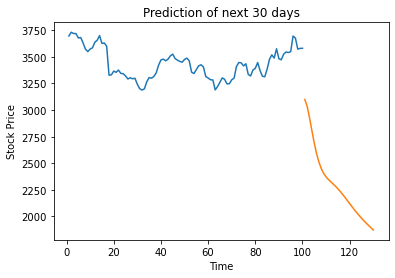

In [335]:
Y1=y1.tolist()
Y1.extend(lst1_output)
plt.plot(day_new,scaler1.inverse_transform(y1[1158:]))
plt.plot(day_pred,scaler1.inverse_transform(lst1_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

So we can see the price will decrease in the next 30 days in our prediction, so i took the short action for amazon stock because we believe the price will decrease in the future.

## Nike

In [245]:
import pandas as pd
Nike = pd.read_csv('Nike.csv')

In [246]:
y2 = Nike.reset_index()['Close/Last']
y2

0        51.01
1        50.63
2        50.07
3        50.65
4        50.46
         ...  
1253    171.35
1254    174.88
1255    174.24
1256    172.15
1257    172.03
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'Nike Stock Price')

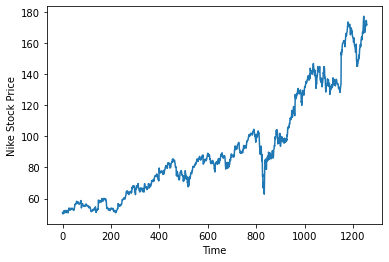

In [247]:
plt.plot(y2)
plt.xlabel('Time')
plt.ylabel('Nike Stock Price')

In [248]:
scaler2 = MinMaxScaler(feature_range=(0,1))
y2 = scaler2.fit_transform(np.array(y2).reshape(-1,1))

In [268]:
training_size2 = int(len(y2)*0.65)
test_size2 = len(y2) - training_size2
train_data2,test_data2=y2[0:training_size2,:],y2[training_size2:len(y2),:1]

In [254]:
import numpy
def create_dataset2(dataset2, time_step=1):
    dataX2, dataY2 = [], []
    for o in range(len(dataset2)-time_step-1):
        c = dataset2[o:(o+time_step), 0]
        dataX2.append(c)
        dataY2.append(dataset2[o + time_step, 0])
    return numpy.array(dataX2), numpy.array(dataY2)

In [255]:
time_step = 100
X2_train, y2_train = create_dataset2(train_data2, time_step)
X2_test, y2test = create_dataset2(test_data2, time_step)

In [256]:
X2_train = X2_train.reshape(X2_train.shape[0],X2_train.shape[1] , 1)
X2_test = X2_test.reshape(X2_test.shape[0],X2_test.shape[1] , 1)

In [262]:
model2 = Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X2_train,y2_train,validation_data=(X2_test,y2test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 179ms/step - loss: 0.0149 - val_loss: 0.0988
Epoch 2/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0032 - val_loss: 0.0074
Epoch 3/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 4/100
12/12 [==============================] - 1s 93ms/step - loss: 6.8236e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 1s 89ms/step - loss: 5.5118e-04 - val_loss: 0.0053
Epoch 6/100
12/12 [==============================] - 1s 91ms/step - loss: 5.3865e-04 - val_loss: 0.0061
Epoch 7/100
12/12 [==============================] - 1s 92ms/step - loss: 5.0721e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 1s 95ms/step - loss: 5.1311e-04 - val_loss: 0.0032
Epoch 9/100
12/12 [==============================] - 1s 93ms/step - loss: 5.2018e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 1s 100ms/step - loss:

12/12 [==============================] - 1s 101ms/step - loss: 2.5319e-04 - val_loss: 0.0021
Epoch 80/100
12/12 [==============================] - 1s 92ms/step - loss: 2.4612e-04 - val_loss: 8.7261e-04
Epoch 81/100
12/12 [==============================] - 1s 95ms/step - loss: 2.4309e-04 - val_loss: 0.0021
Epoch 82/100
12/12 [==============================] - 1s 94ms/step - loss: 2.3003e-04 - val_loss: 0.0025
Epoch 83/100
12/12 [==============================] - 1s 94ms/step - loss: 2.2741e-04 - val_loss: 9.6571e-04
Epoch 84/100
12/12 [==============================] - 1s 91ms/step - loss: 2.6227e-04 - val_loss: 0.0019
Epoch 85/100
12/12 [==============================] - 1s 97ms/step - loss: 2.8231e-04 - val_loss: 0.0028
Epoch 86/100
12/12 [==============================] - 1s 90ms/step - loss: 2.2535e-04 - val_loss: 9.2865e-04
Epoch 87/100
12/12 [==============================] - 1s 90ms/step - loss: 2.4958e-04 - val_loss: 0.0046
Epoch 88/100
12/12 [==============================] - 1

In [263]:
train_predict2 = model2.predict(X2_train)
test_predict2 = model2.predict(X2_test)

In [269]:
train_predict2 = scaler2.inverse_transform(train_predict2)
test_predict2 = scaler2.inverse_transform(test_predict2)

In [270]:
math.sqrt(mean_squared_error(y2_train,train_predict2))

77.2493575469989

In [271]:
math.sqrt(mean_squared_error(y2test,test_predict2))

138.85826258114486

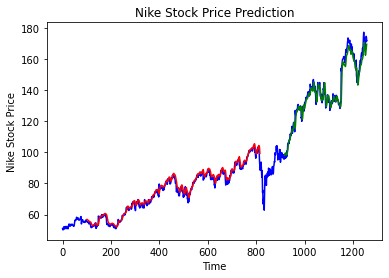

In [272]:
look_back=100
trainPredictPlot2 = numpy.empty_like(y2)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back:len(train_predict2)+look_back, :] = train_predict2
testPredictPlot2 = numpy.empty_like(y2)
testPredictPlot2[:, :] = numpy.nan
testPredictPlot2[len(train_predict2)+(look_back*2)+1:len(y2)-1, :] = test_predict2
plt.plot(scaler2.inverse_transform(y2), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot2, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot2, color = 'green', label = 'Test Predict Price')
plt.title('Nike Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Nike Stock Price')
plt.show()

So the bule line is the actual stock price of Nike, the red line is the training predict price and the green one is the testing predict price, we can see the preiction and the real value are really close so it looks like the model is pretty decent.

In [273]:
len(test_data1)

441

In [274]:
x2_input=test_data2[341:].reshape(1,-1)
x2_input.shape

(1, 100)

In [275]:
temp2_input=list(x2_input)
temp2_input=temp2_input[0].tolist()

In [276]:
from numpy import array
lst2_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp2_input)>100):
        x2_input=np.array(temp2_input[1:])
        print("{} day input {}".format(i,x2_input))
        x2_input=x2_input.reshape(1,-1)
        x2_input=x2_input.reshape((1, n_steps, 1))
        y2hat = model2.predict(x2_input, verbose=0)
        print("{} day output {}".format(i,y2hat))
        temp2_input.extend(y2hat[0].tolist())
        temp2_input=temp2_input[1:]
        lst2_output.extend(y2hat.tolist())
        i=i+1
    else:
        x2_input = x2_input.reshape((1, n_steps, 1))
        y2hat = model2.predict(x2_input, verbose=0)
        print(y2hat[0])
        temp2_input.extend(y2hat[0].tolist())
        print(len(temp2_input))
        lst2_output.extend(y2hat.tolist())
        i=i+1
        
print(lst2_output)

[0.9365661]
101
1 day input [0.86754551 0.87044884 0.87688324 0.87507847 0.87468613 0.87586315
 0.86142498 0.84588826 0.86056183 0.87107659 0.89147834 0.91250785
 0.90254237 0.89846202 0.9054457  0.91745135 0.9215317  0.93126177
 0.95072191 0.95605775 0.9712806  0.96304143 0.9549592  0.95888261
 0.95103578 0.94609228 0.95433145 0.95958883 0.94624922 0.93173258
 0.90646579 0.92372881 0.9388732  0.94091337 0.93981481 0.91690207
 0.92208098 0.92561205 0.89979598 0.89838355 0.89139987 0.88841808
 0.88331764 0.86817326 0.88881042 0.89077213 0.85883553 0.85287194
 0.84620213 0.84376962 0.83451036 0.81748274 0.8235248  0.84251412
 0.85930634 0.78091651 0.76875392 0.74725361 0.75290333 0.74670433
 0.76106403 0.76169178 0.77989642 0.77471751 0.79865035 0.80359385
 0.78633082 0.81042059 0.83356874 0.84016008 0.84698682 0.85812932
 0.84549592 0.85043942 0.8797081  0.88990898 0.89571563 0.89234149
 0.88104206 0.89759887 0.9198054  0.91227244 0.92404269 0.96068738
 0.98375706 1.         0.95558694 

10 day output [[0.7953077]]
11 day input [0.89147834 0.91250785 0.90254237 0.89846202 0.9054457  0.91745135
 0.9215317  0.93126177 0.95072191 0.95605775 0.9712806  0.96304143
 0.9549592  0.95888261 0.95103578 0.94609228 0.95433145 0.95958883
 0.94624922 0.93173258 0.90646579 0.92372881 0.9388732  0.94091337
 0.93981481 0.91690207 0.92208098 0.92561205 0.89979598 0.89838355
 0.89139987 0.88841808 0.88331764 0.86817326 0.88881042 0.89077213
 0.85883553 0.85287194 0.84620213 0.84376962 0.83451036 0.81748274
 0.8235248  0.84251412 0.85930634 0.78091651 0.76875392 0.74725361
 0.75290333 0.74670433 0.76106403 0.76169178 0.77989642 0.77471751
 0.79865035 0.80359385 0.78633082 0.81042059 0.83356874 0.84016008
 0.84698682 0.85812932 0.84549592 0.85043942 0.8797081  0.88990898
 0.89571563 0.89234149 0.88104206 0.89759887 0.9198054  0.91227244
 0.92404269 0.96068738 0.98375706 1.         0.95558694 0.9710452
 0.92741682 0.91729441 0.93392969 0.93204645 0.95543001 0.95472379
 0.95166353 0.97936284

18 day output [[0.7660715]]
19 day input [0.95072191 0.95605775 0.9712806  0.96304143 0.9549592  0.95888261
 0.95103578 0.94609228 0.95433145 0.95958883 0.94624922 0.93173258
 0.90646579 0.92372881 0.9388732  0.94091337 0.93981481 0.91690207
 0.92208098 0.92561205 0.89979598 0.89838355 0.89139987 0.88841808
 0.88331764 0.86817326 0.88881042 0.89077213 0.85883553 0.85287194
 0.84620213 0.84376962 0.83451036 0.81748274 0.8235248  0.84251412
 0.85930634 0.78091651 0.76875392 0.74725361 0.75290333 0.74670433
 0.76106403 0.76169178 0.77989642 0.77471751 0.79865035 0.80359385
 0.78633082 0.81042059 0.83356874 0.84016008 0.84698682 0.85812932
 0.84549592 0.85043942 0.8797081  0.88990898 0.89571563 0.89234149
 0.88104206 0.89759887 0.9198054  0.91227244 0.92404269 0.96068738
 0.98375706 1.         0.95558694 0.9710452  0.92741682 0.91729441
 0.93392969 0.93204645 0.95543001 0.95472379 0.95166353 0.97936284
 0.97434087 0.95794099 0.95699937 0.93656611 0.9250924  0.9097988
 0.89295751 0.87581301

27 day output [[0.74603516]]
28 day input [0.95958883 0.94624922 0.93173258 0.90646579 0.92372881 0.9388732
 0.94091337 0.93981481 0.91690207 0.92208098 0.92561205 0.89979598
 0.89838355 0.89139987 0.88841808 0.88331764 0.86817326 0.88881042
 0.89077213 0.85883553 0.85287194 0.84620213 0.84376962 0.83451036
 0.81748274 0.8235248  0.84251412 0.85930634 0.78091651 0.76875392
 0.74725361 0.75290333 0.74670433 0.76106403 0.76169178 0.77989642
 0.77471751 0.79865035 0.80359385 0.78633082 0.81042059 0.83356874
 0.84016008 0.84698682 0.85812932 0.84549592 0.85043942 0.8797081
 0.88990898 0.89571563 0.89234149 0.88104206 0.89759887 0.9198054
 0.91227244 0.92404269 0.96068738 0.98375706 1.         0.95558694
 0.9710452  0.92741682 0.91729441 0.93392969 0.93204645 0.95543001
 0.95472379 0.95166353 0.97936284 0.97434087 0.95794099 0.95699937
 0.93656611 0.9250924  0.9097988  0.89295751 0.87581301 0.85909712
 0.84331369 0.82883632 0.81592709 0.80473566 0.7953077  0.78759515
 0.78147215 0.77675551 

In [277]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [278]:
len(y2)

1258

Text(0, 0.5, 'Stock Price')

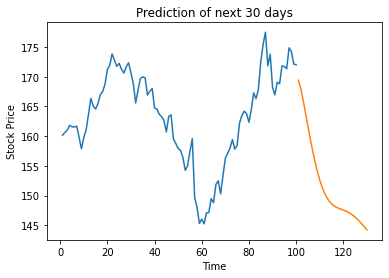

In [281]:
Y2=y2.tolist()
Y2.extend(lst2_output)
plt.plot(day_new,scaler2.inverse_transform(y2[1158:]))
plt.plot(day_pred,scaler2.inverse_transform(lst2_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

So we can see the price of Nike stock will decrease in the next 30 days in our prediction, so i took the short action for nike stock because we believe the price will decrease in the future.